<a href="https://colab.research.google.com/github/HuangJin-De/Machine-Learning-in-Atmospheric-Thermodynamics/blob/master/hw03/hw03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install -qq libgdal-dev libproj-dev
!pip install --no-binary shapely shapely --force
!pip install -I cartopy==0.19.0.post1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 200 kB 5.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.5.post1-cp37-cp37m-linux_x86_64.whl size=669768 sha256=b88d8a7a348f50d6827df48ec1afb337c01dc8a8a65db1166d70d78ef05acc4e
  Stored in directory: /root/.cache/pip/wheels/a3/07/7c/cc50e8ecc795963726466b22ecd395ee1e2a28da87a4cdeb56
Successfully built shapely
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.4
    Uninstalling Shapely-1.8.4:
      Successfully uninstalled Shapely-1.8.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.1 MB 23.6 MB/s 
  Installing build dependencies ... done
  Getting requir

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.util as cutil
import cartopy.crs as ccrs

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

! rm -rf ./drive/MyDrive/CP_data/MLAT
! git clone https://github.com/HuangJin-De/Machine-Learning-in-Atmospheric-Thermodynamics.git ./drive/MyDrive/CP_data/MLAT


Mounted at /content/drive
Cloning into './drive/MyDrive/CP_data/MLAT'...
remote: Enumerating objects: 240, done.
remote: Counting objects: 100% (208/208), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 240 (delta 63), reused 170 (delta 39), pack-reused 32
Receiving objects: 100% (240/240), 170.58 MiB | 19.12 MiB/s, done.
Resolving deltas: 100% (71/71), done.
Checking out files: 100% (35/35), done.


/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


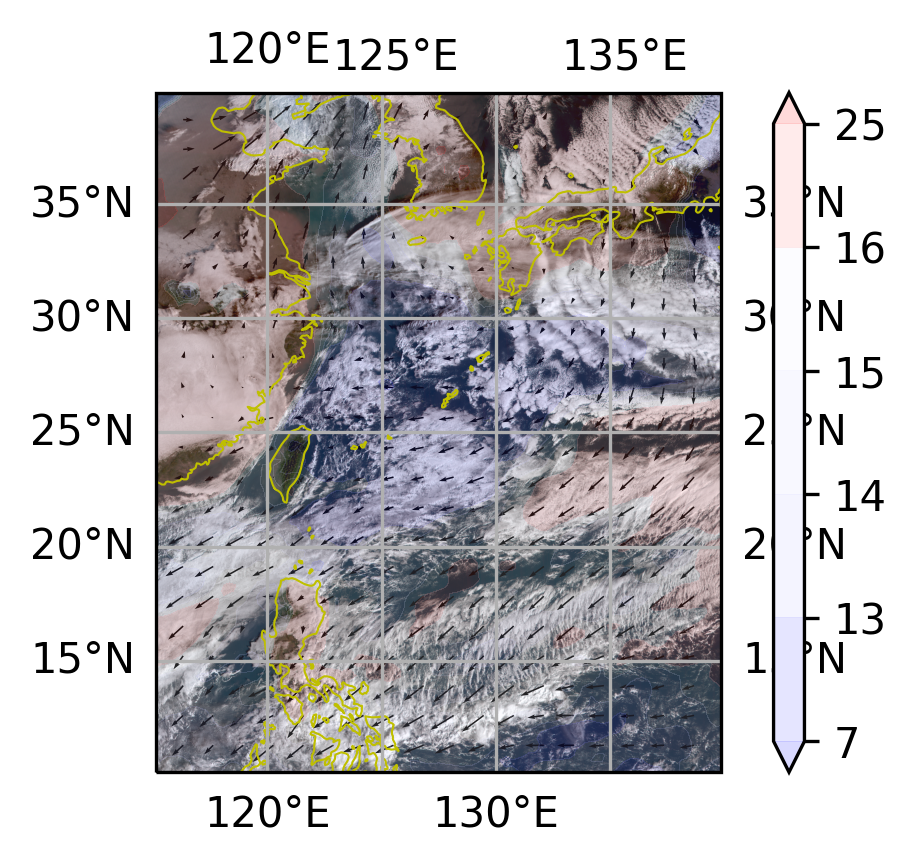

In [4]:
data=np.load('./drive/MyDrive/CP_data/MLAT/hw03/data/201801140000_rgb.npz','rgb')
rgb=data['rgb']

var=np.fromfile('./drive/MyDrive/CP_data/MLAT/hw03/data/lts_nss_data_20180114.dat',dtype=np.float32).reshape(4,121,101)
var=np.where(var<-900,np.nan,var)
x = np.linspace(115.125, 139.875, 101)
y = np.linspace(10.125, 39.875, 121)
x2d, y2d = np.meshgrid(x, y)

fig = plt.figure(figsize=(4.5,3),dpi=300)

extent = [115,140,10,40]

map_proj = ccrs.PlateCarree()
data_crs = ccrs.PlateCarree()

ax = plt.axes(projection=map_proj)

ax.imshow(rgb,origin='lower',extent=extent,transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='y', linewidth=0.5)

ax.quiver(x, y, var[2,:,:], var[3,:,:],transform=data_crs,regrid_shape=20)
im=ax.contourf(x, y, var[1,:,:], extend='both', cmap='bwr', levels=[7,13,14,15,16,25], alpha=0.15)
plt.colorbar(im)

gl = ax.gridlines(draw_labels=True)


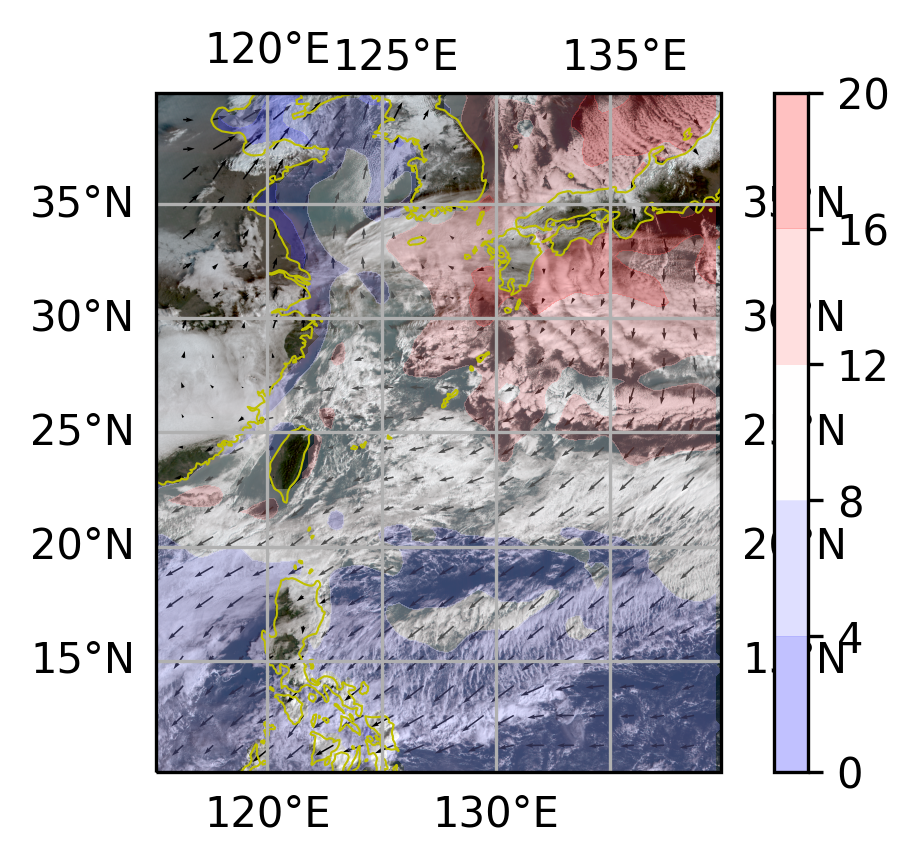

In [5]:
fig = plt.figure(figsize=(4.5,3),dpi=300)

extent = [115,140,10,40]

map_proj = ccrs.PlateCarree()
data_crs = ccrs.PlateCarree()

ax = plt.axes(projection=map_proj)

ax.imshow(rgb,origin='lower',extent=extent,transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='y', linewidth=0.5)

ax.quiver(x, y, var[2,:,:], var[3,:,:],transform=data_crs,regrid_shape=20)
im=ax.contourf(x, y, var[0,:,:], extent=extent, cmap='bwr', levels=np.linspace(0.,20.,6), alpha=0.3)
plt.colorbar(im)

gl = ax.gridlines(draw_labels=True)

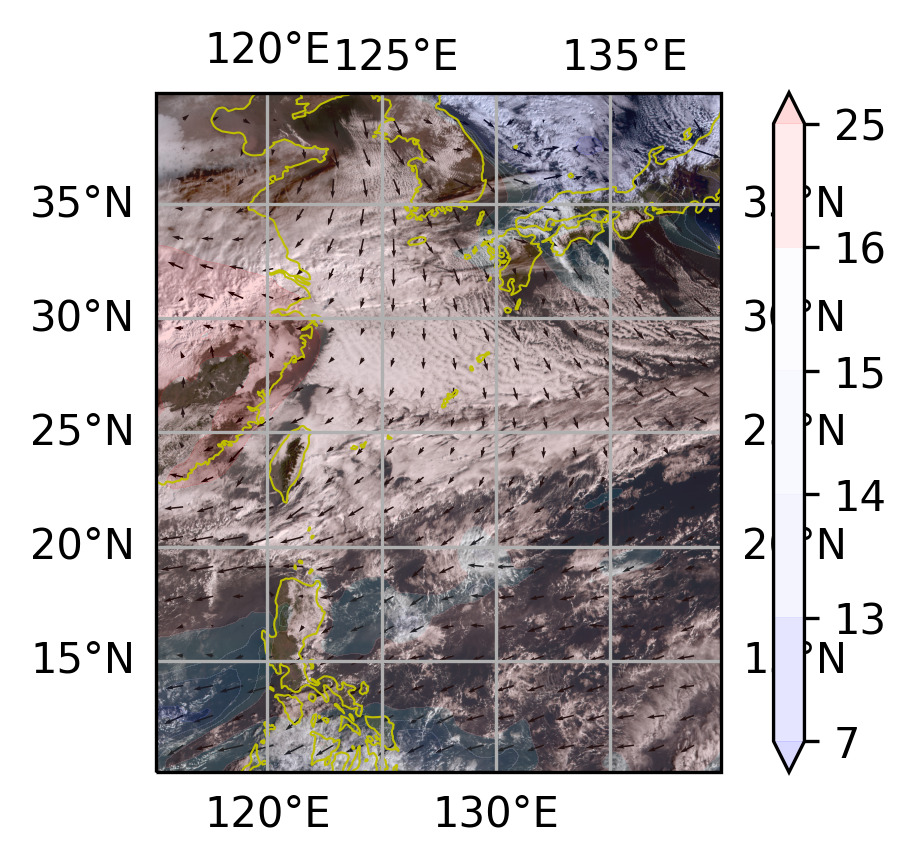

In [7]:
data=np.load('./drive/MyDrive/CP_data/MLAT/hw03/data/202001090000_rgb.npz','rgb')
rgb=data['rgb']

var=np.fromfile('./drive/MyDrive/CP_data/MLAT/hw03/data/lts_nss_data_20200109.dat',dtype=np.float32).reshape(4,121,101)
var=np.where(var<-900,np.nan,var)
x = np.linspace(115.125, 139.875, 101)
y = np.linspace(10.125, 39.875, 121)
x2d, y2d = np.meshgrid(x, y)

fig = plt.figure(figsize=(4.5,3),dpi=300)

extent = [115,140,10,40]

map_proj = ccrs.PlateCarree()
data_crs = ccrs.PlateCarree()

ax = plt.axes(projection=map_proj)

ax.imshow(rgb,origin='lower',extent=extent,transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='y', linewidth=0.5)

ax.quiver(x, y, var[2,:,:], var[3,:,:],transform=data_crs,regrid_shape=20)
im=ax.contourf(x, y, var[1,:,:], extend='both', cmap='bwr', levels=[7,13,14,15,16,25], alpha=0.15)
plt.colorbar(im)

gl = ax.gridlines(draw_labels=True)

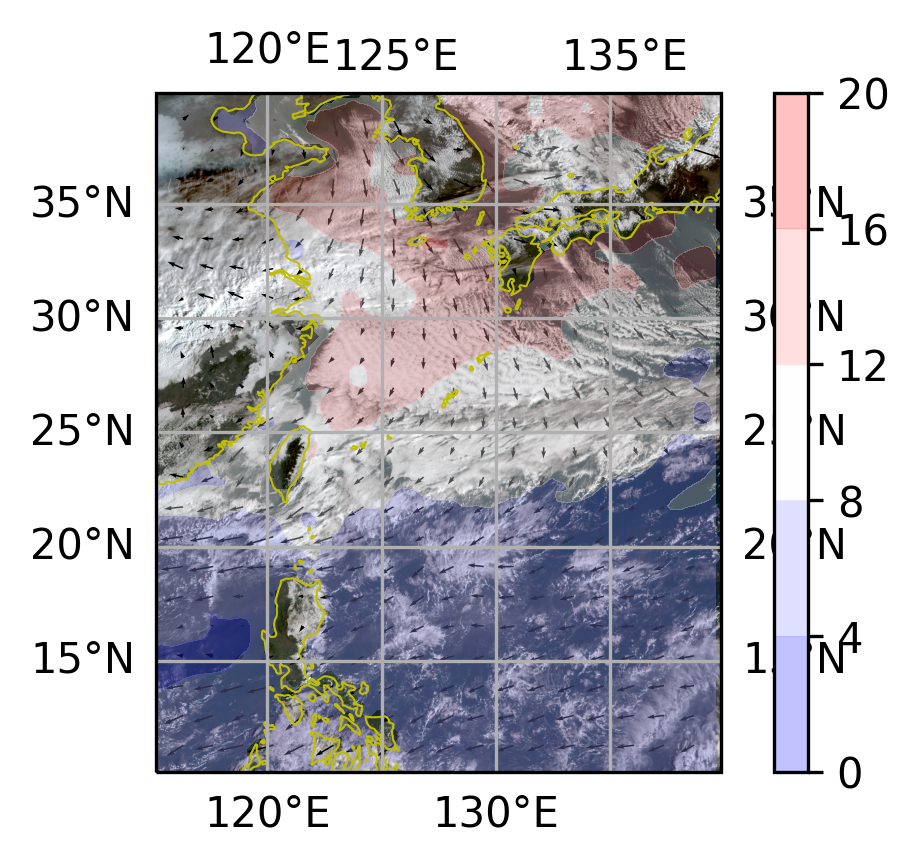

In [8]:
fig = plt.figure(figsize=(4.5,3),dpi=300)

extent = [115,140,10,40]

map_proj = ccrs.PlateCarree()
data_crs = ccrs.PlateCarree()

ax = plt.axes(projection=map_proj)

ax.imshow(rgb,origin='lower',extent=extent,transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='y', linewidth=0.5)

ax.quiver(x, y, var[2,:,:], var[3,:,:],transform=data_crs,regrid_shape=20)
im=ax.contourf(x, y, var[0,:,:], extent=extent, cmap='bwr', levels=np.linspace(0.,20.,6), alpha=0.3)
plt.colorbar(im)

gl = ax.gridlines(draw_labels=True)